In [17]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [36]:
rho_cd = 8.65
rho_zn = 7.14
rho_te = 6.24

rho_czt = rho_cd * 0.45 + rho_zn * 0.05 + rho_te * 0.5

l_czt = 0.8 / 10

In [7]:
data = pd.read_csv('data/xl_calibur', sep='\t')
data

,Photon Energy,Tot. w/ Coherent
0,0.001000,7603.00000
1,0.001003,7553.00000
2,0.001006,7505.00000
3,0.001006,7682.00000
4,0.001013,7567.00000
...,...,...
67,6.000000,0.03528
68,7.000000,0.03587
69,8.000000,0.03659
70,9.000000,0.03739


In [39]:
x = data['Photon Energy'].to_numpy()
y = data['Tot. w/ Coherent'].to_numpy()

y = 1 - np.exp(-y * rho_czt * l_czt)

e_min = np.min(x)
e_max = np.max(x)

f = interp1d(x, y)

x_interp = np.arange(0.1, e_max)

y_interp = f(x_interp)



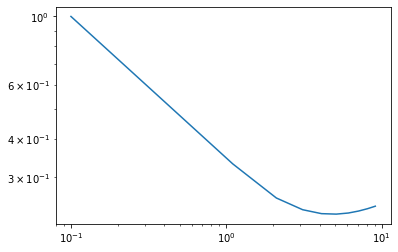

In [38]:
plt.loglog(x_interp, y_interp)
